# Import

In [23]:
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.manifold
import matplotlib.pyplot as plt
import scipy.spatial
import time
import math
from RF import *

# Create Data

In [24]:
# Create Real Data
N = 1000
X, x_total, y_total=create2dobs(N)

# create object IDs that will be just integers
obj_ids = np.arange(len(x_total))

# Create Synthetic Data
X_syn = return_synthetic_data(X)

# Merge Real & Synthetic
X_total, Y_total = merge_work_and_synthetic_samples(X, X_syn)

# RF

In [25]:
# declare an RF
N_TRAIN = 200 # number of trees in the forest
rand_f = sklearn.ensemble.RandomForestClassifier(n_estimators=N_TRAIN)
rand_f.fit(X_total, Y_total)

## Object's probability
Z2=rand_f.predict_proba(X)[:,0]
print('Avg. prob. of Real in RF tree given a Real observation: '),
print(Z2.mean())

Avg. prob. of Real in RF tree given a Real observation:  0.854500924603


# Calculate Distance Matrices

In [26]:
# Calculate RF distance matrix
start=time.time()
dis_mat = calcDisMat(rand_f, X)
end=time.time()
print('build_similarity_matrix3 time:'),
print(end-start)

# Calculate Euclidean Distance Matrix
dis_matEuc=scipy.spatial.distance_matrix(X,X)

build_similarity_matrix3 time: 1.12300014496


# Calculate Wnum

In [27]:
num=5

# Calculate Wnum by RF
wnum = calculateWnum(dis_mat, obj_ids, num)

# Calculate Wnum by Euclidean
wnumEuc=calculateWnum(dis_matEuc,obj_ids,num)

# Get Outlilers

In [28]:
N_outliers = 50

wnum_outliers = np.sort(wnum)[::-1][:N_outliers]
obj_ids_outliers = obj_ids[np.argsort(wnum)][::-1][:N_outliers]

wnum_outliersEuc = np.sort(wnumEuc)[::-1][:N_outliers]
obj_ids_outliersEuc = obj_ids[np.argsort(wnumEuc)][::-1][:N_outliers]

# Plot Data

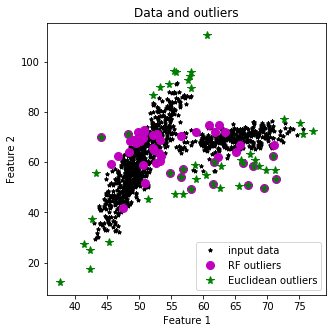

In [37]:
plt.figure()
plt.rcParams['figure.figsize'] = 5, 5
plt.title("Data and outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.plot(X[:,0], X[:,1], "*k", label="input data", markersize=4)
plt.plot(X[obj_ids_outliers, 0], X[obj_ids_outliers, 1], "om", label="RF outliers", markersize=8)
plt.plot(X[obj_ids_outliersEuc, 0], X[obj_ids_outliersEuc, 1], "*g", label="Euclidean outliers", markersize=8)
plt.legend(loc="best")
plt.show()

In [30]:
# Plot Euclidean T-sne

In [31]:
sne = sklearn.manifold.TSNE(n_components=2, perplexity=100, n_iter=10000,metric='precomputed',learning_rate=100).fit_transform(dis_mat)
plotSNE(sne)

In [32]:
sneEuc = sklearn.manifold.TSNE(n_components=2, perplexity=100, n_iter=10000).fit_transform(X)
plotSNE(sneEuc)